##### WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key_main import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#this is a random set, so the list will always be a different length
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list, filter out duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


##### Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
##### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get( city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | tarawa
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | zadar
Processing Record 6 of Set 1 | casper
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | kazerun
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | khenchela
Processing Record 12 of Set 1 | pudasjarvi
Processing Record 13 of Set 1 | kalemie
Processing Record 14 of Set 1 | nadi
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | ola
Processing Record 23 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.01,99,100,3.58,GS,1699928006
1,waitangi,-43.9535,-176.5597,13.25,89,3,9.11,NZ,1699928007
2,tarawa,1.4190,172.9840,30.05,79,75,3.09,KI,1699928007
3,arraial do cabo,-22.9661,-42.0278,23.76,89,76,4.26,BR,1699927765
4,zadar,44.1197,15.2422,14.34,94,40,2.57,HR,1699928007


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.01,99,100,3.58,GS,1699928006
1,waitangi,-43.9535,-176.5597,13.25,89,3,9.11,NZ,1699928007
2,tarawa,1.4190,172.9840,30.05,79,75,3.09,KI,1699928007
3,arraial do cabo,-22.9661,-42.0278,23.76,89,76,4.26,BR,1699927765
4,zadar,44.1197,15.2422,14.34,94,40,2.57,HR,1699928007


### Create the Scatter Plots Requested

##### Latitude Vs. Temperature

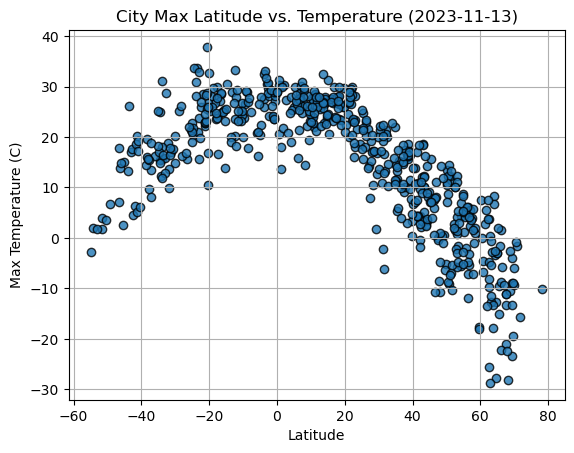

In [9]:
# Build scatter plot for latitude vs. temperature
# x_values = city_data_df['Lat']
# y_values = city_data_df['Max Temp']
# plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

##### Latitude Vs. Humidity

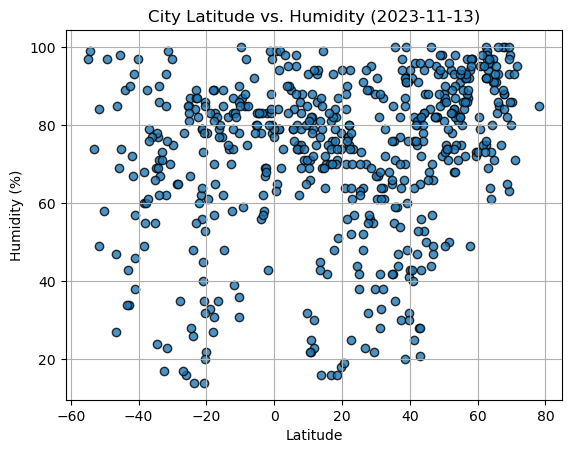

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

##### Latitude Vs. Cloudiness

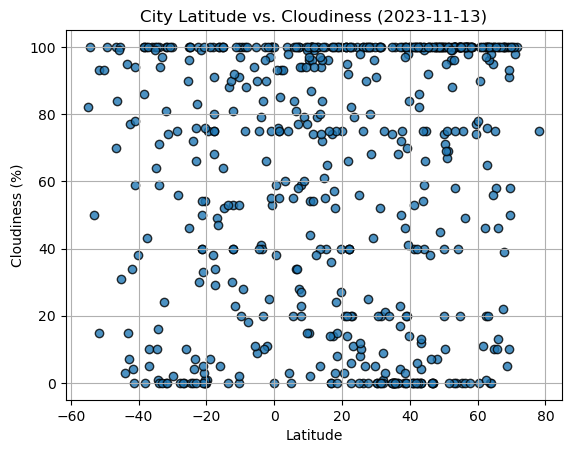

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

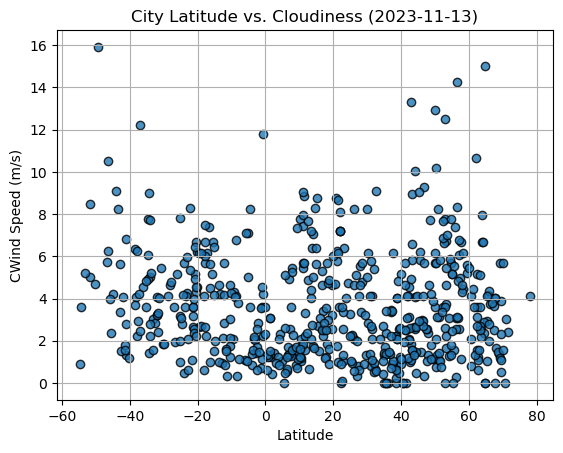

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('CWind Speed (m/s)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

#### Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tarawa,1.4190,172.9840,30.05,79,75,3.09,KI,1699928007
4,zadar,44.1197,15.2422,14.34,94,40,2.57,HR,1699928007
5,casper,42.8666,-106.3131,12.12,21,0,4.92,US,1699927977
6,tiksi,71.6872,128.8694,-15.62,95,100,2.40,RU,1699928008
7,kazerun,29.6195,51.6541,16.77,38,5,1.32,IR,1699928008


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.01,99,100,3.58,GS,1699928006
1,waitangi,-43.9535,-176.5597,13.25,89,3,9.11,NZ,1699928007
3,arraial do cabo,-22.9661,-42.0278,23.76,89,76,4.26,BR,1699927765
12,kalemie,-5.9475,29.1947,20.81,92,94,1.10,CD,1699928009
13,nadi,-17.8000,177.4167,30.00,70,75,5.66,FJ,1699928009


####  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7692858976134047


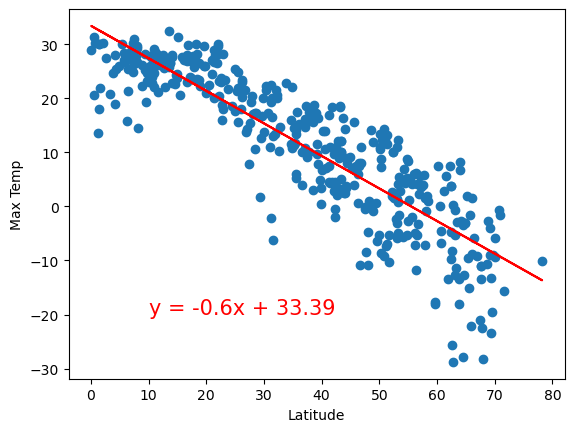

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(10,-20))

The r-value is: 0.5098241499387984


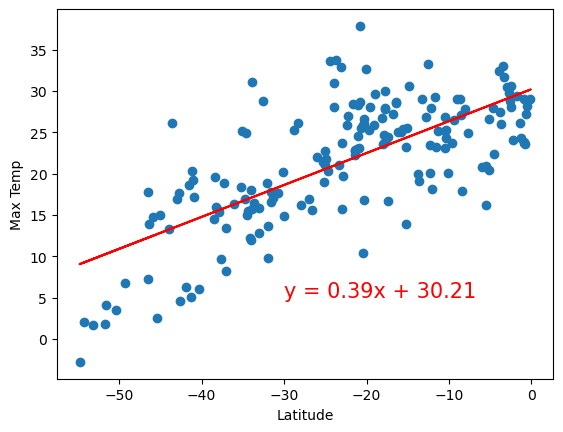

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-30,5))

**Discussion about the linear relationship:** The linear regression line for temperature vs latitude is negative in the Northern Hemisphere and is positive in the Southern Hemisphere. The correlation factor of in the Northern hemisphere is 0.77 which is considered a strong correlation. The correlation factor in the Southern hemisphere is 0.51 which is considered to be a weak correlation. At the equator, which is latitude of zero, the sun hits the earth in a direst fashion. The sun will cause the temperature to be warmer closer to zero. As the latitude becomes greater, in the Northern Hemisphere, the temperature goes down as it approaches the Arctic Circle. 

#### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06415513377509181


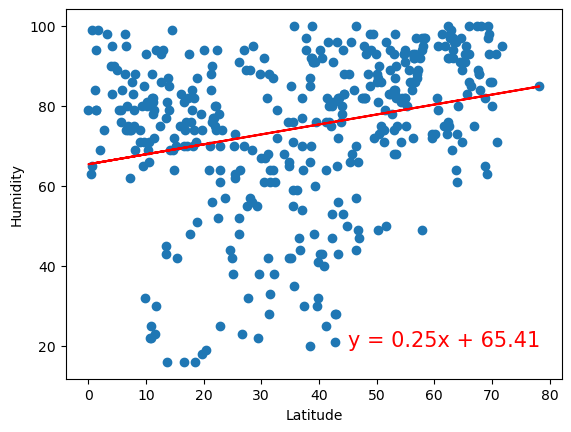

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(45,20))

The r-value is: 0.01447880640915222


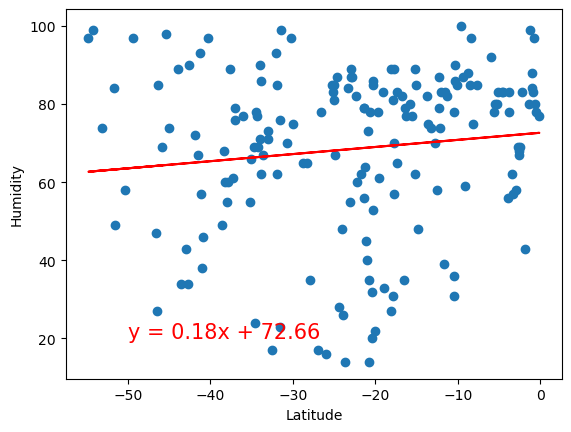

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-50,20))

**Discussion about the linear relationship:** The linear regression line for humidity vs latitude is positive in both Northen Hemiphere and Southern Hemisphere. The correlation for both the are below 0.3, which is considered no correlation or very weak.

#### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011509488974979111


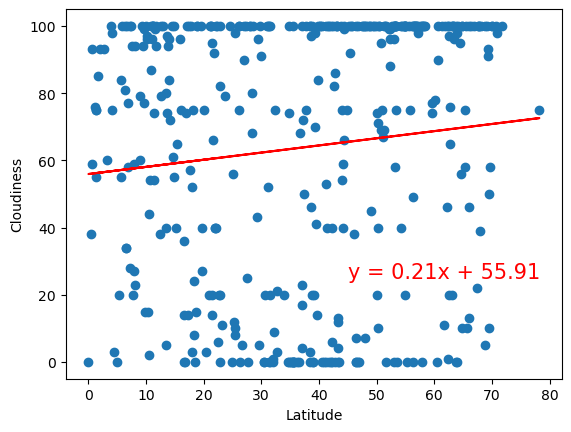

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(45,25))

The r-value is: 0.0008701936660440692

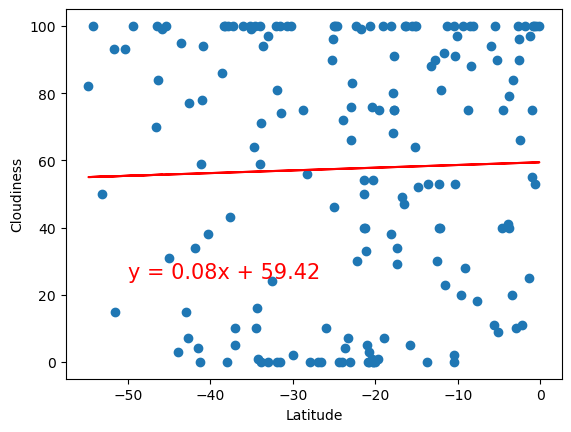

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-50,25))

**Discussion about the linear relationship:** The linear regression line in both the Northern and Southern Hemisphere is positive for cloudiness vs latitude. However, the correlation factor for both hemispheres are below 0.3, which is considered no correlation of very week.

#### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009828028099940286


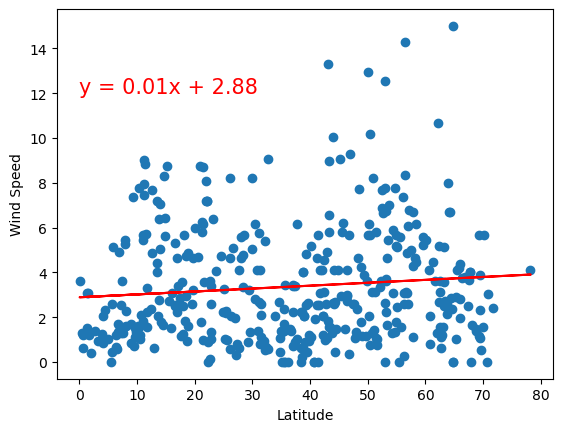

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(0,12))

The r-value is: 0.06816683039707176


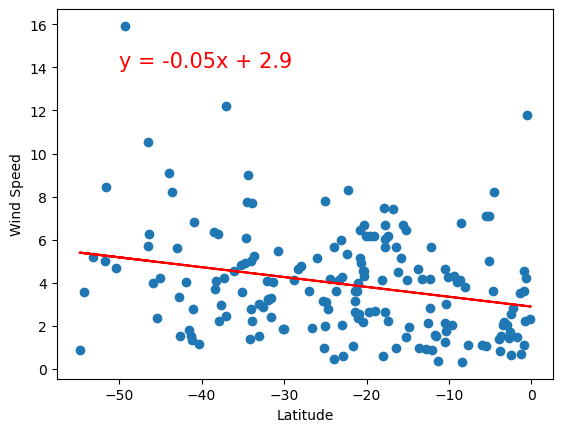

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-50,14))

**Discussion about the linear relationship:** The linear regression line in the Northern Hemisphere is positive, and the negative in the Southern Hemisphere. Both correlation in each hemipshere is below 0.3 and this is considered no correlation or very weak.

**Conclusion:** The only significant finding in correlation, considering all graphs, is a direct corrrelation in the Northern Hemisphere of temperature vs. latitude.